In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Layer
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [63]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,1


In [4]:
df.shape

(20640, 10)

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
mean_value = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(mean_value, inplace=True)


C:\Users\91862\AppData\Local\Temp\ipykernel_6100\363102242.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(mean_value, inplace=True)


In [7]:
df.isnull().sum().sum()

0

In [9]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

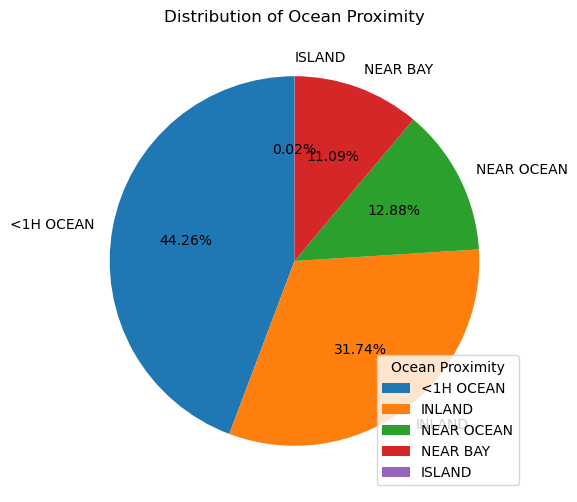

In [16]:
ocean_counts = df['ocean_proximity'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(ocean_counts, labels=ocean_counts.index, autopct="%0.2f%%", startangle=90)
plt.legend(ocean_counts.index, title="Ocean Proximity", loc="lower right")
plt.title("Distribution of Ocean Proximity")
plt.show()

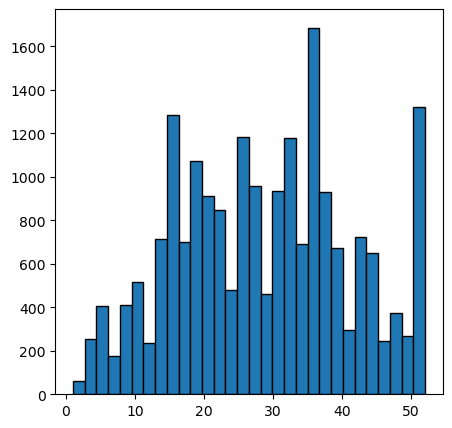

In [18]:
plt.figure(figsize=(5,5))
plt.hist(df['housing_median_age'],bins=30,edgecolor='black')
plt.show()

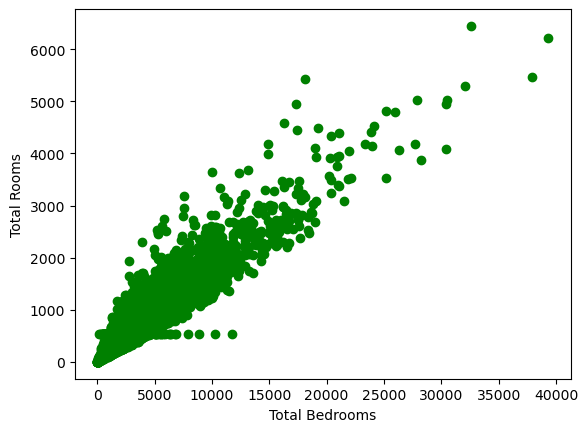

In [20]:
plt.scatter(df['total_rooms'],df['total_bedrooms'],color='green')
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Rooms')
plt.show()

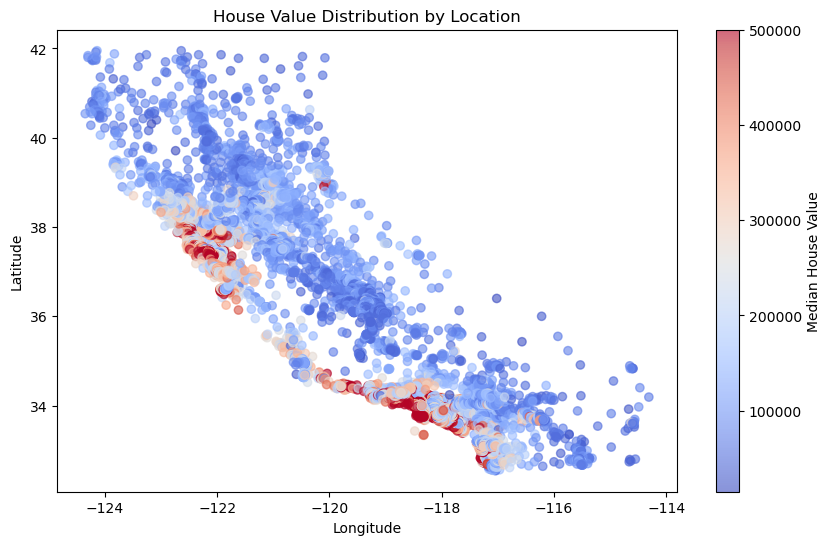

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Value Distribution by Location')
plt.show()


In [24]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
la = LabelEncoder()

In [26]:
df['ocean_proximity'] = la.fit_transform(df['ocean_proximity'])

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [28]:
X = df.drop(columns=['median_house_value'],axis=1)
y = df['median_house_value']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
scale = MinMaxScaler()

In [32]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [33]:
model = Sequential()

In [47]:
model.add(Dense(1000,activation='relu',input_dim=9))
model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(1,activation='linear'))

C:\Users\91862\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             153 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1000)                │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 644,165 (2.46 MB)

 Trainable params: 636,082 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,083 (31.58 KB)

In [92]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [93]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history=model.fit(X_train, y_train, epochs=1000, validation_split=0.2, batch_size=50, callbacks=[early_stopping])

Epoch 1/1000
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 3312697344.0000 - mae: 40459.7383 - val_loss: 3878576384.0000 - val_mae: 42007.0469
Epoch 2/1000
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3706370304.0000 - mae: 42415.4844 - val_loss: 3761522432.0000 - val_mae: 41828.7266
Epoch 3/1000
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3540902144.0000 - mae: 41366.0430 - val_loss: 3927382784.0000 - val_mae: 44169.5977
Epoch 4/1000
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3478640896.0000 - mae: 41153.6133 - val_loss: 3800066816.0000 - val_mae: 43035.9570
Epoch 5/1000
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3361762816.0000 - mae: 40610.2148 - val_loss: 3840810752.0000 - val_mae: 41796.7070
Epoch 6/1000
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3661866240.0000 - mae: 42637.4023 - val_loss: 3805884416.0000 - val_mae: 42753.1133
Epoch 7/1000
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3398592256.0000 - mae: 40960.6172 - val_loss: 3853000192.0

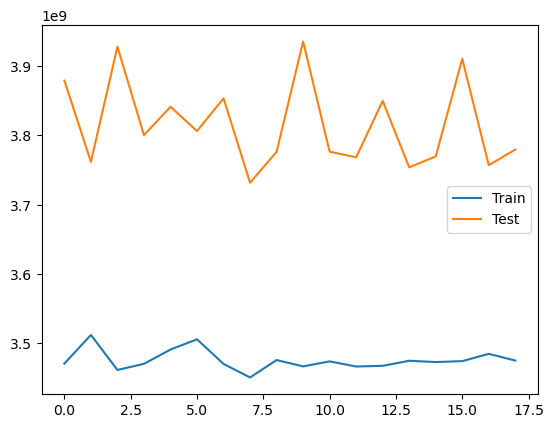

In [95]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

70.24151005875139